# John Denver “Take Me Home, Country Roads” 

Facts about the song:  
1. “Take Me Home, Country Roads,” was written by Bill Danoff, Taffy Nivert, and John Denver.  
2. The song was originally intended for Johny Cash to perform.  
3. It was released as a single performed by Denver on April 12, 1971.
4. Reach #2 on the US Billboard Hot 100 chart for the week ending August 28, 1971.
5. In 2014 the song became one of West Virgina's official state anthems. 

### Imports, Read, and Data Info

In [ ]:
#last file update 2025/05/10
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

from wordcloud import STOPWORDS
from wordcloud import WordCloud
from tabulate import tabulate
from collections import Counter

In [2]:
data = pd.read_csv("csv transcript/Denver_countryRoad.csv", header=None)
data.head()

,0
0,Almost heaven West Virginia Blue Ridge Mountai...


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       1 non-null      object
dtypes: object(1)
memory usage: 140.0+ bytes


In [4]:
#lower case text 
text = ' '.join(data[0].dropna().astype(str))
text = re.sub(r'[^a-zA-Z\s]', '', text.lower())

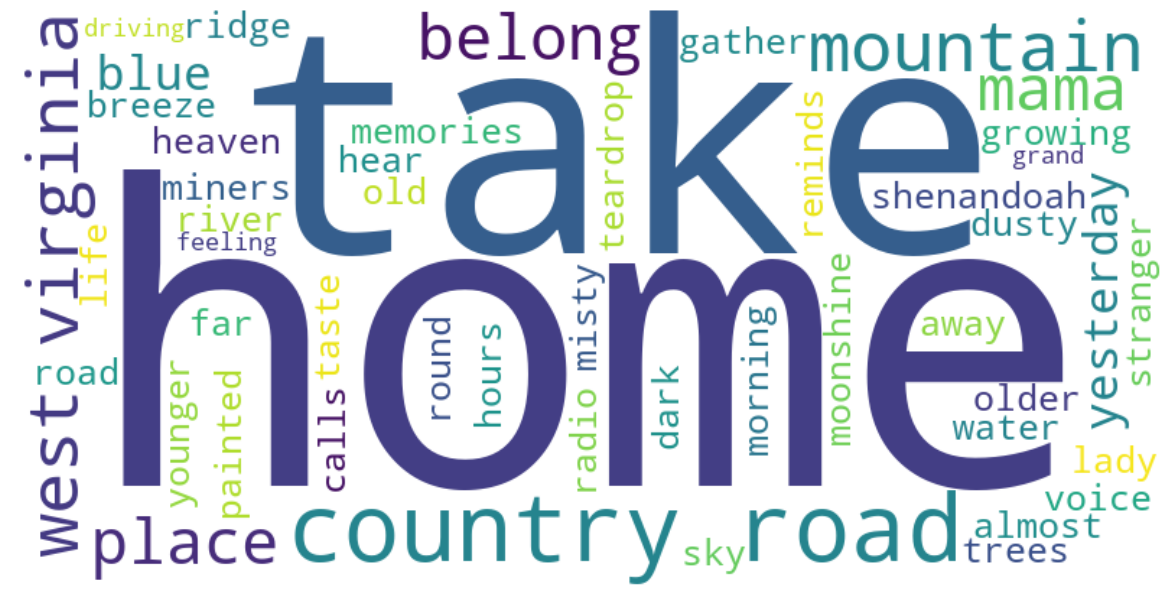

In [5]:
#wordcloud generation
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(text)

# Display the generated image
plt.figure(figsize=(15, 7.5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [6]:
#a better look at word values within
words = text.split()
word_counts = Counter(words)

word_counts_df = pd.DataFrame(word_counts.items(), columns=['Word', 'Frequency'])
word_counts_df = word_counts_df.sort_values(by='Frequency', ascending=False)
top_25 = word_counts_df.head(25)

print(tabulate(top_25, headers=['Word', 'Frequency'], tablefmt='pretty'))

+----+-----------+-----------+
|    |   Word    | Frequency |
+----+-----------+-----------+
| 26 |   home    |    12     |
| 25 |    me     |    12     |
| 23 |   road    |    10     |
| 24 |   take    |    10     |
| 15 |    the    |    10     |
| 22 |  country  |    10     |
| 29 |     i     |     7     |
| 27 |    to     |     5     |
| 3  | virginia  |     5     |
| 2  |   west    |     5     |
| 32 |   mama    |     4     |
| 28 |   place   |     4     |
| 30 |  belong   |     4     |
| 34 |    my     |     3     |
| 31 | mountain  |     3     |
| 20 |     a     |     2     |
| 54 |    in     |     2     |
| 51 |    of     |     2     |
| 38 |    her    |     2     |
| 6  | mountains |     2     |
| 4  |   blue    |     2     |
| 14 |   than    |     2     |
| 73 | yesterday |     2     |
| 63 |    far    |     1     |
| 50 |   taste   |     1     |
+----+-----------+-----------+


## Word Cloud Analysis Using Image Files

In [ ]:
#image wordcloud generation imports
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator

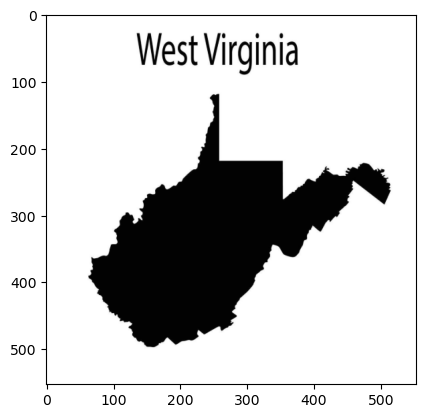

In [8]:
# read the data
text2 = open('csv transcript/Denver_countryRoad.csv', 'r').read()

# word cloud will be made with the shape of this image
background_image = np.array(Image.open('pics/wvOG.png'))
plt.imshow(background_image)

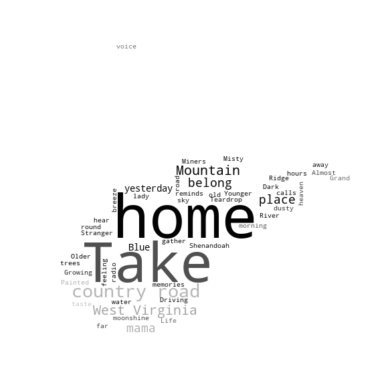

In [9]:
# Creating word_cloud with text as argument 
word_cloud2 = WordCloud(background_color = 'white',mask = background_image, 
               width = 2048, height = 1080).generate(text2)

# font color matching the masked image
img_colors = ImageColorGenerator(background_image)
word_cloud2.recolor(color_func = img_colors)

#saving the image
word_cloud2.to_file('pics/wv.png')

#show the image
plt.imshow(word_cloud2, interpolation='bilinear')
plt.axis("off")
plt.show()


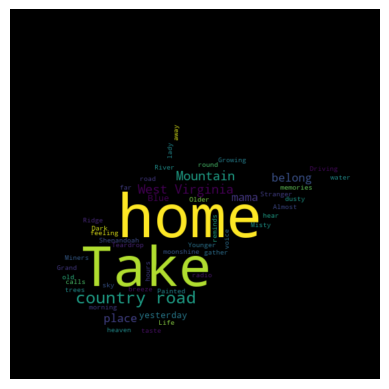

In [22]:
#or if you want to colormap
word_cloud2 = WordCloud(
    background_color='black',
    mask=background_image,
    width=2048,
    height=1080,
    colormap='viridis'  
).generate(text2)

# Saving the image
word_cloud2.to_file('pics/wv2.png')

# Show the image
plt.imshow(word_cloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

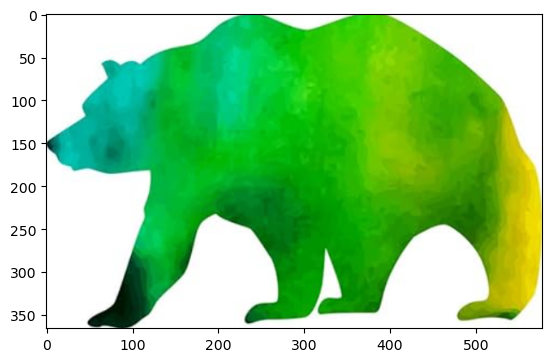

In [10]:
#try another image, read the data
text3 = open('csv transcript/Denver_countryRoad.csv', 'r').read()

# word cloud will be made with the shape of this image
mask = np.array(Image.open("pics/bearOG.png"))
plt.imshow(mask)

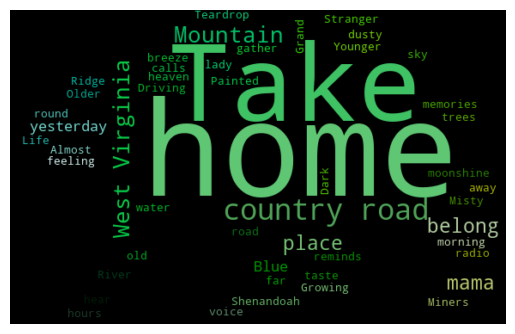

In [ ]:
# Word_cloud with text as argument using .generate() method
wordcloud3 = WordCloud(background_color='black', mask=mask).generate(text3)

# font color to match the masked image
image_colors = ImageColorGenerator(mask)
wordcloud3 = wordcloud3.recolor(color_func=image_colors)

#save
wordcloud3.to_file('pics/bear.png')

#show the image
plt.imshow(wordcloud3, interpolation='bilinear')
plt.axis("off")
plt.show()